## Used Packages

matplotlib : 시각화를 위한 그래프 라이브러리

          graph library for visualization

numpy(numerical python) : 선형대수(배열,행렬) 연산에 효과적인 라이브러리

          An effective library for linear algebra(arrays, matrices)

pandas : 구조화된 데이터를 가공하는데 효과적인 라이브러리 (dataframe)

          An effective library for structured data processing

scikit-learn : 데이터 분석을 위한 라이브러리 (numpy, scipy, matplotlib 기반)

          library for data analysis

statsmodels : 통계적 모델 추정을 위한 라이브러리

          library for statistical model estimation

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
from sklearn import svm
from sklearn.datasets import load_boston

## Used Dataset
### 당뇨병 환자 442명의 검사 데이터 from sklearn  (442 diabetic patients data from sklearn)
종속변수(dependent variable) : 1년 후의 당뇨병 진행도 (diabetes progression after 1 year)

독립변수(independent variable) : 나이, 성별, BMI지수, 혈압 등 10개의 변수 (age, sex, BMI index, pressure pressure, etc.)

In [5]:
diabetes = datasets.load_diabetes()
dfX=pd.DataFrame(diabetes.data)
dfy=pd.DataFrame(diabetes.target)
dfdiabetes=pd.concat([dfX, dfy], axis=1)
dfdiabetes.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','y']
dfdiabetes

dfX

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504



### Split dataset

In [4]:
print(len(diabetes.data)*0.7)
X_train, X_test , y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=1)
dfXtrain=pd.DataFrame(X_train)
dfytrain=pd.DataFrame(y_train)
dfXtest=pd.DataFrame(X_test)
dfytest=pd.DataFrame(y_test)

dftrain=pd.concat([dfXtrain,dfytrain],axis=1)
dftest=pd.concat([dfXtest,dfytest],axis=1)
dftrain.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','y']
dftest.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','y']
dftrain

309.4


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,0.030811,-0.044642,0.104809,0.076958,-0.011201,-0.011335,-0.058127,0.034309,0.057104,0.036201,270.0
1,0.067136,0.050680,-0.030996,0.004658,0.024574,0.035638,-0.028674,0.034309,0.023375,0.081764,172.0
2,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.023234,-0.010266,-0.002592,-0.001499,0.019633,78.0
3,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011008,0.069338,94.0
4,0.081666,0.050680,0.006728,-0.004523,0.109883,0.117056,-0.032356,0.091875,0.054724,0.007207,131.0
5,0.034443,0.050680,-0.001895,-0.012556,0.038334,0.013717,0.078093,-0.039493,0.004552,-0.096346,109.0
6,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.017162,0.100183,-0.039493,-0.070209,-0.079778,52.0
7,-0.020045,-0.044642,0.097264,-0.005671,-0.005697,-0.023861,-0.021311,-0.002592,0.061686,0.040343,275.0
8,-0.063635,0.050680,-0.079497,-0.005671,-0.071743,-0.066449,-0.010266,-0.039493,-0.018118,-0.054925,101.0
9,-0.023677,-0.044642,0.059541,-0.040099,-0.042848,-0.043589,0.011824,-0.039493,-0.015998,0.040343,85.0


## model training and result

In [5]:
kr_linear = GridSearchCV(KernelRidge(kernel='linear', gamma=0.1), cv=5,
                  param_grid={"gamma": np.logspace(-2, 2, 5)})
kr_rbf = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"gamma": np.logspace(-2, 2, 5)})
kr_poly = GridSearchCV(KernelRidge(kernel='poly', gamma=0.1), cv=5,
                  param_grid={"gamma": np.logspace(-2, 2, 5)})


kr_fit_linear = kr_linear.fit(dfXtrain, dfytrain)
kr_fit_rbf = kr_rbf.fit(dfXtrain, dfytrain)
kr_fit_poly = kr_poly.fit(dfXtrain, dfytrain)

kr_linear_pred = kr_fit_linear.predict(dfXtest)
kr_rbf_pred = kr_fit_rbf.predict(dfXtest)
kr_poly_pred = kr_fit_poly.predict(dfXtest)

rsme1 = np.sqrt(mean_squared_error(dfytest, kr_linear_pred))
rsme2 = np.sqrt(mean_squared_error(dfytest, kr_rbf_pred))
rsme3 = np.sqrt(mean_squared_error(dfytest, kr_poly_pred))


print("linear RSME :")
print(rsme1)
print("rbf RSME :")
print(rsme2)
print("poly RSME :")
print(rsme3)

linear RSME :
162.487565064
rbf RSME :
54.7946061853
poly RSME :
53.8558895825


# Logistic Regression
### breast_cancer data (569개 데이터) 
종속변수 : 양성 1 , 음성 0

독립변수 : 심장의 이미지를 설명하는 30개의 변수

In [6]:
breast_cancer = datasets.load_breast_cancer()
dfX=pd.DataFrame(breast_cancer.data)
dfy=pd.DataFrame(breast_cancer.target)
dfbreast_cancer=pd.concat([dfX, dfy], axis=1)

print(len(breast_cancer.data)*0.7)
X_train, X_test , y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=1)
dfXtrain=pd.DataFrame(X_train)
dfytrain=pd.DataFrame(y_train)
dfytrain=dfytrain[0]
dfXtest=pd.DataFrame(X_test)
dfytest=pd.DataFrame(y_test)

398.29999999999995


In [7]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

log = LogisticRegression()
log_fit = log.fit(dfXtrain, dfytrain)
log_pred = log_fit.predict(dfXtest)

print('Accuracy:', accuracy_score(dfytest, log_pred))
print('F1 score:', f1_score(dfytest, log_pred))
print('Recall:', recall_score(dfytest, log_pred))
print('Precision:', precision_score(dfytest, log_pred))
print('\n clasification report:\n', classification_report(dfytest,log_pred))
print('\n confussion matrix:\n',confusion_matrix(dfytest, log_pred))

Accuracy: 0.953216374269
F1 score: 0.963636363636
Recall: 0.981481481481
Precision: 0.946428571429

 clasification report:
              precision    recall  f1-score   support

          0       0.97      0.90      0.93        63
          1       0.95      0.98      0.96       108

avg / total       0.95      0.95      0.95       171


 confussion matrix:
 [[ 57   6]
 [  2 106]]


## SVDD (Support Vector Data Description)

In [8]:
boston = datasets.load_boston()['data'][:, [5, 12]]
dfX = pd.DataFrame(boston)
dfX

,0,1
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
5,6.430,5.21
6,6.012,12.43
7,6.172,19.15
8,5.631,29.93
9,6.004,17.10


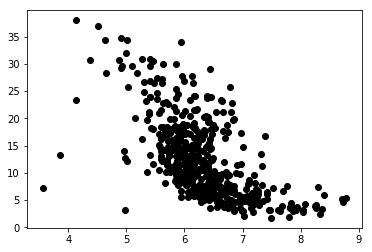

In [9]:
plt.scatter(dfX[0], dfX[1], color='black')
plt.show()

In [10]:
SVDD = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.2)
SVDD2 = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
SVDD3 = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
##nu = if 0<C<=1/3, 1
##     if 1/3<C<=4/3, 1/3+ 2/9C
##     if 4/3<C<=4, 1/2
##     if C>4, 1/2C

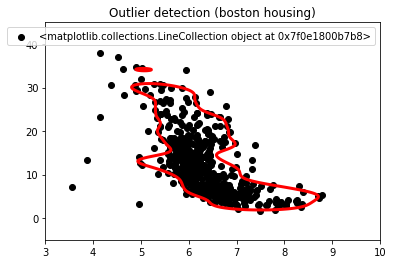

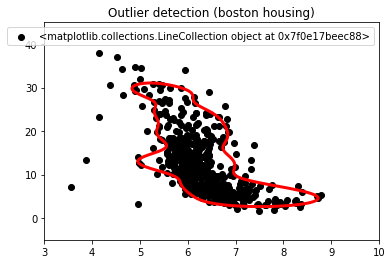

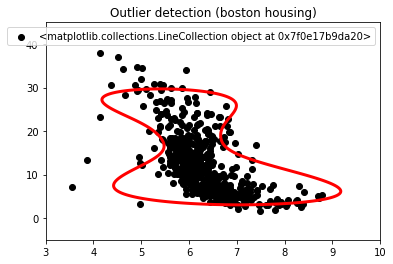

In [11]:
xx, yy = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))

plt.figure(1)
SVDD.fit(dfX)
Z = SVDD.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

legend = plt.contour(xx,yy,Z, levels=[0], linewidths=3, colors='r')
plt.title("Outlier detection (boston housing)")
plt.scatter(dfX[0], dfX[1], color='black')
plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.legend(legend.collections)

plt.figure(2)
SVDD2.fit(dfX)
Z = SVDD2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

legend = plt.contour(xx,yy,Z, levels=[0], linewidths=3, colors='r')
plt.title("Outlier detection (boston housing)")
plt.scatter(dfX[0], dfX[1], color='black')
plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.legend(legend.collections)

plt.figure(3)
SVDD3.fit(dfX)
Z = SVDD3.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

legend = plt.contour(xx,yy,Z, levels=[0], linewidths=3, colors='r')
plt.title("Outlier detection (boston housing)")
plt.scatter(dfX[0], dfX[1], color='black')
plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.legend(legend.collections)

plt.show()